<a href="https://colab.research.google.com/github/prashanthdnss/Nithya_INFO5731_Fall2020/blob/master/Final_Project/Progress/Group6_IPL_Term_Project_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy  #Installing Tweepy for twitter data

**Tweets extracted 11/8/2020**

In [ ]:
#Program to get twitter data using Twitter API 

import json
import csv
import tweepy
import re
import os
def twitter_hashtag(api_key, api_key_secret, access_token, access_token_secret, hashtag):
    
    auth = tweepy.OAuthHandler(api_key, api_key_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth,wait_on_rate_limit=True)
    
    file_name = '_'.join(re.findall(r"#(\w+)", hashtag))

    with open('%s.csv' % (file_name), 'w') as file:

        w = csv.writer(file)

        w.writerow(['created', 'tweet_text', 'username', 'all_hashtags'])

        for tweet in tweepy.Cursor(api.search, q=hashtag+' -filter:retweets', lang="en", tweet_mode='extended').items(1000):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'),[e['text'] for e in tweet._json['entities']['hashtags']]])
            


api_key = input('Please give twitter api key')
api_key_secret = input('Please give twitter api key secret')
access_token = input('Please give twitter access token')
access_token_secret = input('Please give twitter access token secret')
    
hashtag = input('enter the hashtag')

twitter_hashtag(api_key, api_key_secret, access_token, access_token_secret, hashtag)



Please give twitter api keyePjdnPqsmA5Mgjewf5i5Vtnuw
Please give twitter api key secretV83Stor4JRihnxggUa9OODxIrAc8EHmQdJxlnpxAGZXjqbJA7v
Please give twitter access token1287853629869821952-ZsnNF12Y53o5JfCOUBPn72lO0OJau1
Please give twitter access token secretTSYcER5dl5L72dcbpo8f0LzQqfn6qX3r2n1QsLpOGxRAz
enter the hashtag#IPL2020


In [158]:
#Saving the twitter data to a csv file
import pandas as pd
tweets=pd.read_csv('/content/sample_data/IPL2020 (1).csv')
tweets.head()

,created,tweet_text,username,all_hashtags
0,2020-11-09 04:49:21,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']"
1,2020-11-09 04:49:16,b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali..."
2,2020-11-09 04:48:52,"b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I..."
3,2020-11-09 04:48:41,b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020']
4,2020-11-09 04:47:57,b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai..."


In [159]:
#Functions to clean Tweets

def remove_tag(string):
    tweet_text=re.sub('<.*?>','',string)
    return tweet_text
def remove_mention(tweet_text):
    line=re.sub(r'@\w+','',tweet_text)
    return line
def remove_hash(tweet_text):
    line=re.sub(r'#\w+','',tweet_text)
    return line

def remove_newline(string):
    tweet_text=re.sub('\n','',string)
    return tweet_text
def remove_url(string): 
    tweet_text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return tweet_text
def remove_number(tweet_text):
    line=re.sub(r'[0-9]+','',tweet_text)
    return line
def remove_punct(tweet_text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',tweet_text)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line



In [160]:
!pip install nltk #installing NLTK Package

In [191]:
#Clensing the tweets

import nltk
import json
import csv
import tweepy
import re
import os

tweets['refine_text']=tweets['tweet_text'].str.lower()
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_tag(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_mention(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_hash(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_newline(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_url(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_number(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_punct(x))

tweets['refine_text']=tweets['refine_text'].apply(lambda x:text_strip(x))

tweets['text_length']=tweets['refine_text'].str.split().map(lambda x: len(x))

#Remove noise
tweets['refine_text'] = tweets['refine_text'].str.replace('[^\w\s]','')


#Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['amp','xcxa','via','xexcx','th','ipl','final','v','from','xexcxxefxbxf','xfxfxaxa','xfxfxx','xfxfxcxb','xfxfxxf','xfxfxx', 'xfxfxxd','xfxfxxa','i','the','we','it', 'subject', 're', 'edu', 'use'])
tweets['refine_text'] = tweets['refine_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweets['refine_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#lemmatization
!pip install -U textblob
from textblob import Word
import nltk
nltk.download('wordnet')

tweets['refine_text'] = tweets['refine_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [192]:
tweets['refine_text']

0      blook youngster priyam garg kane williamson ma...
1                  bthis mrxcxb dangerous animal cricket
2      bgreat thing happen dont stop believing trying...
3      bt natarajan made mark yorkers xfxfxxc see pla...
4                         b marcus stoinis warning check
                             ...                        
995    bcongratulations entering final first time kee...
996    bwell played ur fight back frm ending rd place...
997    bshikhar dhawan would take another former team...
998    bif winning heart art kane williamson artistxe...
999      bo dilli tu roar macha xfxfxaxxfxfxx made first
Name: refine_text, Length: 1000, dtype: object

In [193]:
#Saaving the clensed data to a new CSV file
tweets.to_csv('clean_tweets.csv') 

In [194]:
# importing pandas module  
import pandas as pd 
  
# importing module for regex 
import re 
# importing numpy module 
import numpy as np
# importing P=mathplot lib
import matplotlib.pyplot as plt
# reading csv file from url  
dat = pd.read_csv("/content/clean_tweets.csv")
selected_columns = dat[["refine_text"]]
data = selected_columns.copy()


In [195]:
# count of occurrence of each team mentions and creating new column 
data["count1"]= data["refine_text"].str.count("csk", re.I) 
data["count2"]= data["refine_text"].str.count( "DC", re.I) 
data["count3"]= data["refine_text"].str.count( "KXIP", re.I) 
data["count4"]= data["refine_text"].str.count( "KKR", re.I) 
data["count5"]= data["refine_text"].str.count( "MI", re.I) 
data["count6"]= data["refine_text"].str.count( "RR", re.I) 
data["count7"]= data["refine_text"].str.count( "RCB", re.I) 
data["count8"]= data["refine_text"].str.count( "SRH", re.I)

In [196]:
# count of occurrence of each team mention with their state name and creating new column 
data["count11"]= data["refine_text"].str.count("Chennai", re.I) 
data["count22"]= data["refine_text"].str.count( "Delhi", re.I) 
data["count33"]= data["refine_text"].str.count( "Punjab", re.I) 
data["count44"]= data["refine_text"].str.count( "Kolkata", re.I) 
data["count55"]= data["refine_text"].str.count( "Mumbai", re.I) 
data["count66"]= data["refine_text"].str.count( "Rajasthan", re.I) 
data["count77"]= data["refine_text"].str.count( "Bangalore", re.I) 
data["count88"]= data["refine_text"].str.count( "Hyderabad", re.I)

In [197]:
#aggrigating the total mentions
data["csk"] = data["count1"] + data["count11"]
data["DC"] = data["count2"] + data["count22"]
data["KXIP"]= data["count3"] + data["count33"]
data["KKR"]= data["count4"] + data["count44"]
data["MI"]= data["count5"] + data["count55"]
data["RR"]= data["count6"] + data["count66"]
data["RCB"]= data["count7"] + data["count77"]
data["SRH"]= data["count8"] + data["count88"]

In [199]:
data

,refine_text,count1,count2,count3,count4,count5,count6,count7,count8,count11,count22,count33,count44,count55,count66,count77,count88,csk,DC,KXIP,KKR,MI,RR,RCB,SRH
0,blook youngster priyam garg kane williamson ma...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,bthis mrxcxb dangerous animal cricket,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,bgreat thing happen dont stop believing trying...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,bt natarajan made mark yorkers xfxfxxc see pla...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,b marcus stoinis warning check,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,bcongratulations entering final first time kee...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,bwell played ur fight back frm ending rd place...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,bshikhar dhawan would take another former team...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,bif winning heart art kane williamson artistxe...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [200]:
#dropping the previous count coloumns to clean the dataframe
data1=data.drop(['count1', 'count11','count2','count22','count3','count33','count4','count44','count5','count55','count6','count66','count7','count77','count8','count88'], axis=1)

In [201]:
#aggrigating the total mentions team wise and saving the results to a dictionary
dict = data1.sum(axis = 0, skipna = True)

In [202]:
dict

refine_text    blook youngster priyam garg kane williamson ma...
csk                                                           53
DC                                                           261
KXIP                                                          23
KKR                                                           19
MI                                                           296
RR                                                            76
RCB                                                           69
SRH                                                           97
dtype: object

In [204]:
#saving the values to an array to use the results to plot
y= dict.values
z =np.delete(y, 0, 0)
z.tolist()


[53, 261, 23, 19, 296, 76, 69, 97]

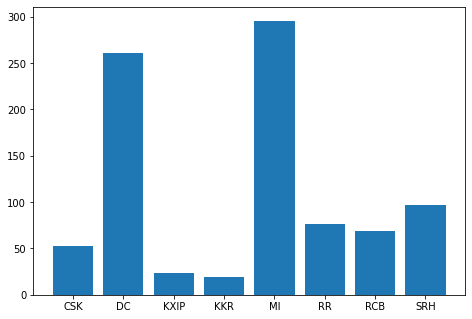

In [206]:
#plotting the results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
q = ["CSK" ,"DC","KXIP", "KKR","MI","RR","RCB","SRH"]
ax.bar(q,z)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


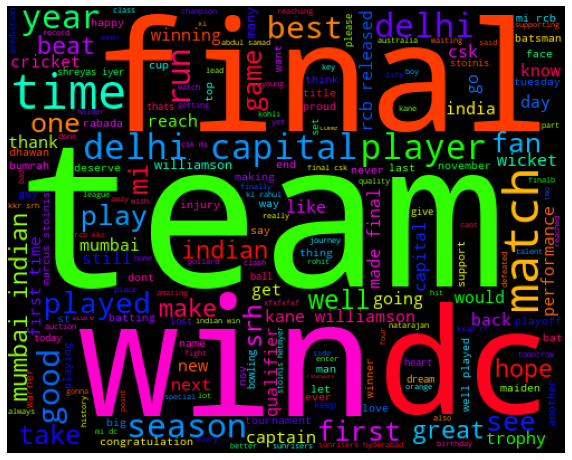

In [207]:
#Importing the packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')


#Building a word cloud:
words = pd.Series(tweets["refine_text"].tolist()).astype(str)

stop_words = ["https", "co", "rt"]
stop = set(stopwords.words('english'))

for i in range(0, len(words)):
    words[i] = " ".join([x for x in words[i].lower().split() if x not in stop_words])
    words[i] = " ".join([x for x in words[i].lower().split() if x not in stop])

stop = set(stopwords.words('english'))    
cloud = WordCloud(width=500, height=400,
                  stopwords=(stop), 
                  colormap='hsv').generate(''.join(words.astype(str)))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [208]:

import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams



def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(tweets['refine_text'],(1,1),20)
bigram_df=ngram_df(tweets['refine_text'],(2,2),20)
trigram_df=ngram_df(tweets['refine_text'],(3,3),20)

In [209]:
bigram_df=ngram_df(tweets['refine_text'],(2,2),20)
trigram_df=ngram_df(tweets['refine_text'],(3,3),20)
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [210]:
#sentimmental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,created,tweet_text,username,all_hashtags,refine_text,text_length,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,hour,date,minute
0,2020-11-09 04:49:21,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']",blook youngster priyam garg kane williamson ma...,40,0.6969,0.720,0.062,0.218,POSITIVE,4,2020-11-09,49
1,2020-11-09 04:49:16,b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali...",bthis mrxcxb dangerous animal cricket,9,-0.4767,0.563,0.437,0.000,NEGATIVE,4,2020-11-09,49
2,2020-11-09 04:48:52,"b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I...",bgreat thing happen dont stop believing trying...,21,0.8219,0.482,0.000,0.518,POSITIVE,4,2020-11-09,48
3,2020-11-09 04:48:41,b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020'],bt natarajan made mark yorkers xfxfxxc see pla...,19,0.3400,0.806,0.000,0.194,POSITIVE,4,2020-11-09,48
4,2020-11-09 04:47:57,b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai...",b marcus stoinis warning check,8,-0.3400,0.556,0.444,0.000,NEGATIVE,4,2020-11-09,47


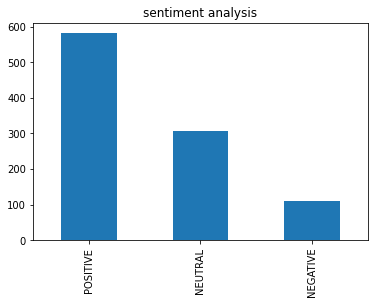

In [211]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

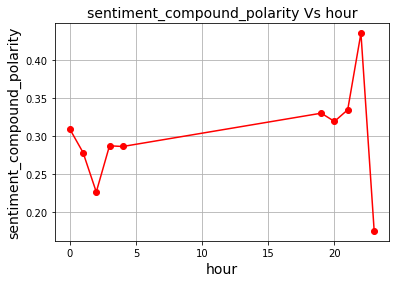

In [212]:
#Polarity of tweets hour wise
import pandas as pd
import matplotlib.pyplot as plt

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute
df=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.mean())
  
plt.plot(df['hour'], df['sentiment_compound_polarity'], color='red', marker='o')
plt.title('sentiment_compound_polarity Vs hour', fontsize=14)
plt.xlabel('hour', fontsize=14)
plt.ylabel('sentiment_compound_polarity', fontsize=14)
plt.grid(True)
plt.show()

In [186]:
pip install pyLDAvis

In [213]:

import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [214]:

#spliting the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def split(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [215]:
data['text_split']=data['refine_text'].apply(split)

In [216]:
#create dictionary
dictionary = corpora.Dictionary(data['text_split'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

10031


In [217]:

#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['text_split'] ]
print(len(doc_term_matrix))

1000


In [218]:
lda = gensim.models.ldamodel.LdaModel

In [219]:
num_topics=10
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: user 21.6 s, sys: 27.3 ms, total: 21.6 s
Wall time: 21.6 s


In [220]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.022*"b" + 0.015*"injured" + 0.011*"champion" + 0.010*"match" + 0.009*"well" + 0.008*"team" + 0.007*"williamson" + 0.007*"back" + 0.006*"nov" + 0.006*"first"'),
 (1,
  '0.027*"mi" + 0.019*"dc" + 0.018*"run" + 0.017*"b" + 0.016*"capital" + 0.015*"rcb" + 0.014*"delhi" + 0.014*"match" + 0.013*"srh" + 0.013*"csk"'),
 (2,
  '0.025*"v" + 0.020*"dc" + 0.018*"year" + 0.017*"b" + 0.013*"mi" + 0.010*"fan" + 0.010*"time" + 0.007*"game" + 0.007*"prediction" + 0.007*"finalist"'),
 (3,
  '0.017*"b" + 0.017*"team" + 0.015*"played" + 0.013*"bipl" + 0.011*"indian" + 0.011*"bcongratulations" + 0.010*"maiden" + 0.010*"final" + 0.009*"well" + 0.008*"rabada"'),
 (4,
  '0.025*"b" + 0.022*"indian" + 0.021*"delhi" + 0.017*"mumbai" + 0.016*"win" + 0.015*"capital" + 0.011*"player" + 0.011*"team" + 0.010*"first" + 0.010*"year"'),
 (5,
  '0.029*"b" + 0.014*"team" + 0.012*"final" + 0.011*"iyer" + 0.011*"best" + 0.010*"shreyas" + 0.009*"trophy" + 0.009*"win" + 0.008*"ever" + 0.008*"see"'),
 (6,
  '0.022*"s

In [41]:
pip install tomotopy

     |████████████████████████████████| 13.5MB 316kB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20071 sha256=e04a7646110556b5852e9e7562d581a9e7ac8f29a1732043f99354557a128ecb
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built py-cpuinfo


**Supervised LDA** Reference code taken: https://github.com/bab2min/tomotopy

In [221]:
import tomotopy as tp
SLDA_topic_modeling = tp.SLDAModel(k=15) #number of topics 6
for i in tweets["refine_text"]:
    SLDA_topic_modeling.add_doc(i.split()) #splitting each sentence

for k in range(SLDA_topic_modeling.k):
    print('Top 10 words of topic #{}'.format(k))
    print(SLDA_topic_modeling.get_topic_words(k, top_n=20))

SLDA_topic_modeling.summary()

Top 10 words of topic #0
[('b', 0.018081247806549072), ('final', 0.016691451892256737), ('delhi', 0.013911859132349491), ('dc', 0.013911859132349491), ('played', 0.012522063218057156), ('one', 0.011132266372442245), ('run', 0.011132266372442245), ('team', 0.00974247045814991), ('capital', 0.00974247045814991), ('win', 0.00974247045814991), ('indian', 0.006962878629565239), ('see', 0.006962878629565239), ('wicket', 0.006962878629565239), ('mi', 0.006962878629565239), ('mumbai', 0.0055730827152729034), ('game', 0.0055730827152729034), ('bcongratulations', 0.0055730827152729034), ('qualifier', 0.0055730827152729034), ('well', 0.0055730827152729034), ('year', 0.0055730827152729034)]
Top 10 words of topic #1
[('b', 0.027231603860855103), ('team', 0.019454849883913994), ('win', 0.015566471964120865), ('match', 0.012974219396710396), ('final', 0.011678094044327736), ('v', 0.011678094044327736), ('srh', 0.011678094044327736), ('delhi', 0.009085842408239841), ('williamson', 0.007789716590195894

**K-means** Reference : https://www.kaggle.com/karthik3890/text-clustering

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
tfidf = tfidf_vector.fit_transform(tweets["refine_text"].values)
tfidf.shape

(1000, 2936)

In [223]:
from sklearn.cluster import KMeans
model_tfif = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tfif.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [224]:
labels_tfif = model_tfif.labels_
cluster_center_tfif=model_tfif.cluster_centers_

In [225]:
cluster_center_tfif

array([[0.        , 0.        , 0.00454361, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00420336, 0.        ,
        0.        ]])

In [226]:
words = tfidf_vector.get_feature_names()

In [227]:
words[1:10]

['aapka',
 'ab',
 'abd',
 'abdul',
 'abdxexcxxefxbxf',
 'abhishek',
 'able',
 'abraham',
 'absolute']

In [228]:
from sklearn import metrics
silhouette_score_tfif = metrics.silhouette_score(tfidf, labels_tfif, metric='euclidean')

In [229]:
silhouette_score_tfif

0.012588063132463596

In [230]:
df_tfif = tweets
df_tfif['Tfidf cluster Labels'] = model_tfif.labels_
df_tfif.head(5)

,created,tweet_text,username,all_hashtags,refine_text,text_length,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,hour,date,minute,Tfidf cluster Labels
0,2020-11-09 04:49:21,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']",blook youngster priyam garg kane williamson ma...,40,0.6969,0.720,0.062,0.218,POSITIVE,4,2020-11-09,49,3
1,2020-11-09 04:49:16,b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali...",bthis mrxcxb dangerous animal cricket,9,-0.4767,0.563,0.437,0.000,NEGATIVE,4,2020-11-09,49,3
2,2020-11-09 04:48:52,"b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I...",bgreat thing happen dont stop believing trying...,21,0.8219,0.482,0.000,0.518,POSITIVE,4,2020-11-09,48,0
3,2020-11-09 04:48:41,b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020'],bt natarajan made mark yorkers xfxfxxc see pla...,19,0.3400,0.806,0.000,0.194,POSITIVE,4,2020-11-09,48,3
4,2020-11-09 04:47:57,b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai...",b marcus stoinis warning check,8,-0.3400,0.556,0.444,0.000,NEGATIVE,4,2020-11-09,47,3


In [231]:
df1.groupby(['Tfidf cluster Labels'])['refine_text'].count()

Tfidf cluster Labels
0    477
1     86
2     43
3     41
4     37
5     35
6     71
7     45
8     77
9     88
Name: refine_text, dtype: int64

In [232]:

print("Top words per cluster:")
order_centroids = model_tfif.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top words per cluster:
Cluster 0: whoever
 worthxfxfxxf
 performance
 run
 rabada
 special
 man
 wicketxfxfxaxaxfxfxaxaxfxfxaxa
 bi
 kane
Cluster 1: csk
 rps
 kkr
 kxip
 srh
 deccan
 rr
 mi
 bno
 rcb
Cluster 2: played
 bwell
 week
 better
 next
 luck
 team
 till
 bcongratulations
 great
Cluster 3: team
 season
 fan
 player
 bcongratulations
 best
 one
 wicketxfxfxaxaxfxfxaxaxfxfxaxa
 champion
 wining
Cluster 4: dc
 mi
 till
 srh
 rcb
 csk
 bmi
 fan
 rr
 bit
Cluster 5: qualifier
 bipl
 tisxfxfxxf
 beat
 hyderabad
 face
 match
 first
 run
 reach
Cluster 6: cap
 purple
 bthe
 good
 rabada
 fight
 final
 clash
 theyxexxve
 orange
Cluster 7: williamsons
 bwho
 indian
 mumbai
 join
 byou
 always
 lose
 life
 till
Cluster 8: final
 made
 released
 till
 first
 rcb
 congratulation
 bdelhi
 see
 hetmyer
Cluster 9: capital
 delhi
 join
 indian
 maiden
 mumbai
 bdelhi
 bqualifier
 williamsons
 stoinis


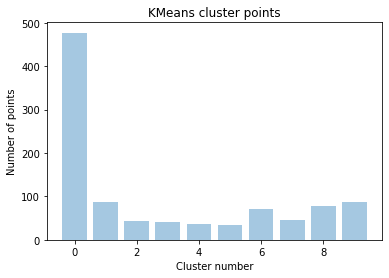

In [233]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf cluster Labels'])['refine_text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

MultinomialNB Method




In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, tweets["sentiment_type"], test_size=0.2,random_state=109)

In [238]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
cm = MultinomialNB()
cm.fit(X_train,y_train)
y_pred = cm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred))

Accuracy: 64.00%
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00        23
     NEUTRAL       1.00      0.12      0.22        56
    POSITIVE       0.63      1.00      0.77       121

    accuracy                           0.64       200
   macro avg       0.54      0.38      0.33       200
weighted avg       0.66      0.64      0.53       200



In [ ]:
RandomForest

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred))

Accuracy: 74.00%
              precision    recall  f1-score   support

    NEGATIVE       0.50      0.09      0.15        23
     NEUTRAL       0.59      0.91      0.71        56
    POSITIVE       0.87      0.79      0.83       121

    accuracy                           0.74       200
   macro avg       0.65      0.59      0.56       200
weighted avg       0.75      0.74      0.72       200



In [241]:
print(pd.DataFrame({'predicted reviews':y_pred}))

    predicted reviews
0             NEUTRAL
1            POSITIVE
2             NEUTRAL
3            POSITIVE
4            POSITIVE
..                ...
195           NEUTRAL
196           NEUTRAL
197          POSITIVE
198          POSITIVE
199           NEUTRAL

[200 rows x 1 columns]
